## A.

#### Import libraries

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from Problem1 import *
iris = load_iris()

#### Load Data

In [121]:
X = iris.data
y = iris.target
X = pd.DataFrame({'x1': X[:, 0]/X[:, 1], 'x2': X[:, 2]/X[:, 3]})

#Scale the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#### Plot data

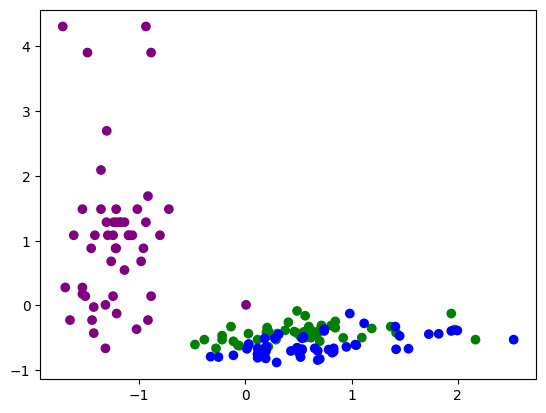

In [132]:
colors = ['purple' if label == 0 else 'green' if label == 1 else 'blue' for label in y]
plt.scatter(X['x1'], X['x2'], c = colors)
plt.show()

## B.
Implemented in Problem1.py

## C.

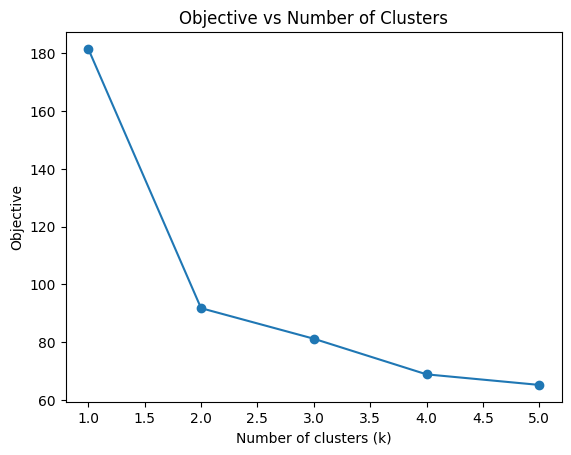

In [133]:
NUM_CLUSTERS = 5
distance_sums = []
for k in range(1, NUM_CLUSTERS + 1):
    final_centers = k_means_pp(X, k, 3)
    distance_sum = compute_objective(X, final_centers)
    distance_sums.append(distance_sum)
    
plt.title("Objective vs Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Objective")
plt.scatter([i for i in range(1, NUM_CLUSTERS + 1)], distance_sums)
plt.plot([i for i in range(1, NUM_CLUSTERS + 1)], distance_sums)
plt.show()


## D. 
The number of clusters should be 5. It appears to have the lowest objective, which is the least amount of error.

## E.

#### 1.

In [135]:
def k_means_pp_with_plot(X, k, max_iter):
    """ k-means++ clustering algorithm with plotting

    step 1: call k_init() to initialize the centers
    step 2: iteratively refine the assignments

    Parameters
    ----------
    X: array, shape(n ,d)
        Input array of n samples and d features

    k: int
        The number of clusters

    max_iter: int
        Maximum number of iteration

    Returns
    -------
    final_centers: array, shape (k, d)
        The final cluster centers
    """
    centers = k_init(X, k)
    
    objectives = []
    
    #Iterate max_iter times
    for m in range(max_iter):
        
        A = assign_data2clusters(X, centers)
        for i in range(len(centers)):
            
            sum_x1 = 0
            sum_x2 = 0
            for j, val in enumerate(A.T[i]):
                if val == 1:
                    sum_x1 += X.iloc[j]['x1']
                    sum_x2 += X.iloc[j]['x2']
                
            col_num = A[:, i].sum()

            if col_num != 0:
                centers[i][0] = sum_x1/col_num
                centers[i][1] = sum_x2/col_num

        objective = compute_objective(X, centers)
        objectives.append(objective)            
            
    final_centers = centers
    plt.title("Iteration vs Objective")
    plt.xlabel("Iteration number")
    plt.ylabel("Objective")
    plt.plot([i for i in range(1, 51)], objectives, c='purple')
    plt.show()
    return final_centers


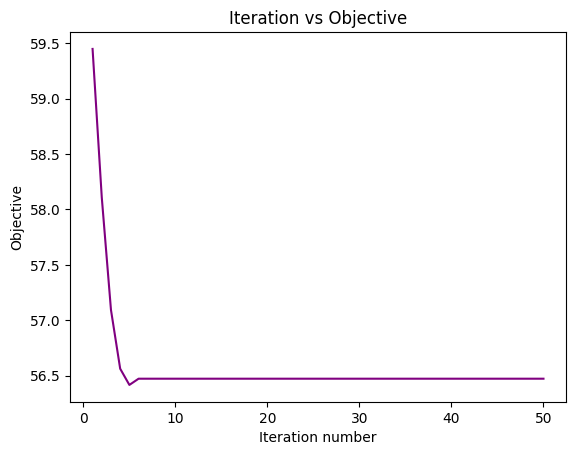

In [136]:
k_means_pp_with_plot(X, 5, 50);

As we can see, the objective error reduces as we increase the amount of iterations, and then once we find the optimal centers, it stops reducing.

#### 2.

In [137]:
def plot_k_means(A, C):
    '''
    Plots each cluster and their centers
    '''
    colors = ["orange", "green", "blue", "purple", "pink"]
        
    for i, arr in enumerate(A):
        for j, num in enumerate(arr):
            if num == 1:
                plt.scatter(X['x1'][i], X['x2'][i], color=colors[j])
                break
                
    for center in C:
        plt.scatter(center[0], center[1], marker='x', c='red', s=200)
        
    plt.title("After k_means")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()
    

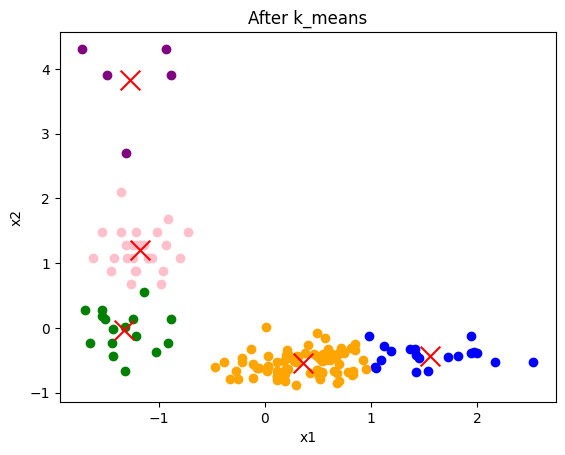

In [138]:
final_centers = k_means_pp(X, 5, 50)
A = assign_data2clusters(X, final_centers)

plot_k_means(A, final_centers)
